In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import datetime
from tensorflow import keras

In [2]:
df = keras.datasets.mnist.load_data()

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

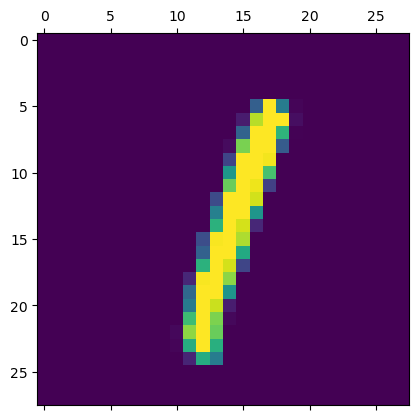

In [8]:
plt.matshow(X_test[5])

In [9]:
y_train[5]

2

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [12]:
y_test[5]

1

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattend, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 8s 3ms/step - loss: 0.4706 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9258


In [14]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9240


[0.2692212760448456, 0.9240000247955322]

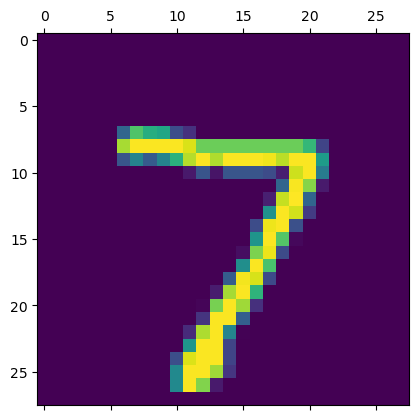

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted = model.predict(X_test_flattend)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.1110898e-02, 4.4005742e-07, 5.8192234e-02, 9.4504839e-01,
       2.5851857e-03, 9.8389097e-02, 9.1488050e-07, 9.9979186e-01,
       7.7468984e-02, 6.0703844e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)  
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    2,    0,    6,   13,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    2,    4,    2,    5,    0],
       [   6,   10,  920,   16,   10,    5,   13,   10,   37,    5],
       [   3,    0,   18,  899,    0,   47,    3,   11,   19,   10],
       [   1,    2,    2,    1,  916,    0,   16,    3,    8,   33],
       [   7,    3,    2,   19,   10,  800,   18,    4,   23,    6],
       [   6,    3,    6,    1,    7,   11,  921,    2,    1,    0],
       [   1,   10,   22,    5,    9,    1,    0,  945,    1,   34],
       [   7,   13,    5,   20,    9,   38,   10,   11,  850,   11],
       [  11,    7,    1,   10,   30,    8,    0,   20,    5,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

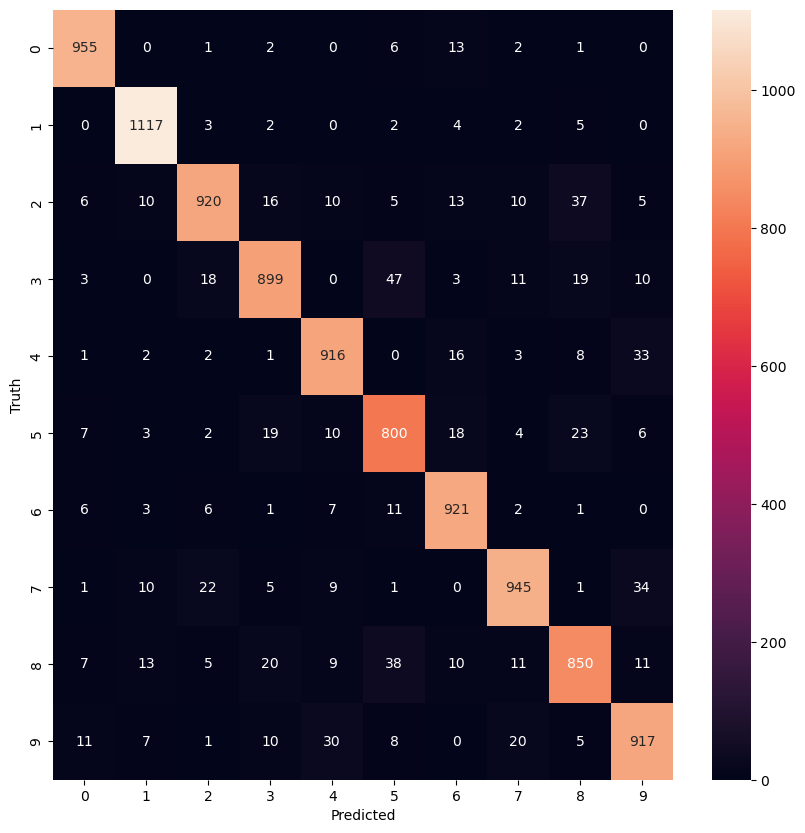

In [21]:
import seaborn as sn 
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,
          y_train,
          epochs=5,
          #validation_data=(X_test, y_test),
          callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6561 - accuracy: 0.8342
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3418 - accuracy: 0.9040
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2942 - accuracy: 0.9170
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2641 - accuracy: 0.9253
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2411 - accuracy: 0.9322


In [23]:
#%load_ext tensorboard
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
jupyter notebook --NotebookApp.tokenUnicode ="mytoken"
